### Importamos todas las librerias necesarias para analisis exploratorio

In [1]:
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import mitosheet
import pydotplus
from six import StringIO
from IPython.display import Image
from pydotplus import graph_from_dot_data

### Cargamos los data set train y test y los combinamos

In [2]:
train_df = pd.read_csv('Titanic_train_original.csv')
test_df = pd.read_csv('Titanic_test_original.csv')
combine = [train_df, test_df]

### Empezamos viendo como esta formado el data set y analisamos su estructura original

#### Imprimimos las keys para saber cuales son las dimensiones

In [3]:
train_df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Imprimimos las primeras filas, por defecto imprime 5, aca imprimimos 10

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Imprimimos las ultimas filas

In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


#### imprimimos la informacion general del data ser

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Imprimimos la descripcion de las variables numericas

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Imprimimos la descripcion de las variables categoricas

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Usamos librerias como profiling para hacer un analisis exploratorio antes de realizar cambios en el data set para seguir entendiendolo mejor

In [9]:
#comentamos para que no lo haga cada vez que ejecutamos todo el codigo
prof = ProfileReport(train_df) 
prof.to_file('titanic_original.html')

### Librerias como Mito tambien ayudan a realizar un analisis exploratorio mas profundo de forma grafica con un entorno mas amigable

In [10]:
mitosheet.sheet(train_df, analysis_to_replay="id-xoswchqnxh")

MitoWidget(analysis_data_json='{"analysisName": "id-yjvcsoheom", "analysisToReplay": {"analysisName": "id-xosw…

### Analisis de correlacion entre las dimenciones y nuestro target

In [11]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### Tambien realizamos el analisis de correlacion pero de manera grafica

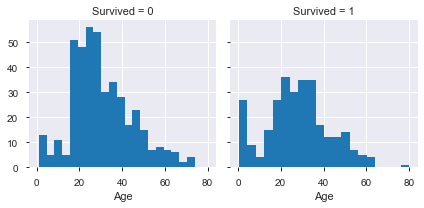

In [15]:
grid = sn.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=20)
np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

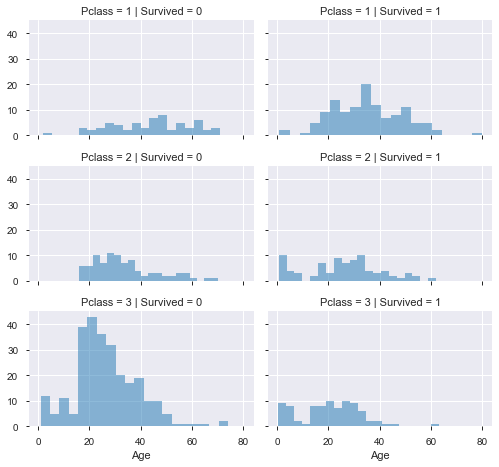

In [16]:
grid = sn.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
np.warnings.filterwarnings('ignore')

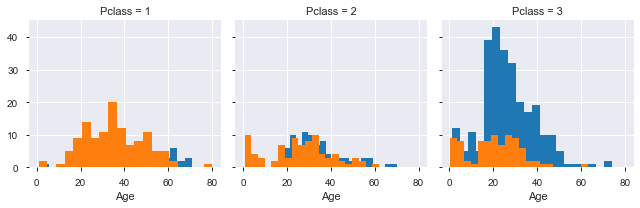

In [17]:
grid = sn.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', bins=20)
np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

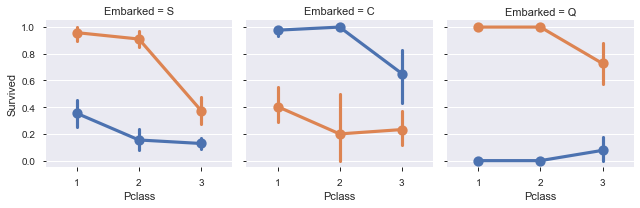

In [18]:
grid = sn.FacetGrid(train_df, col='Embarked')
grid.map(sn.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

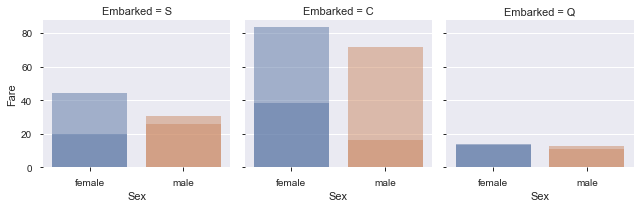

In [19]:
grid = sn.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid.map(sn.barplot, 'Sex', 'Fare', alpha=.5, ci=None,palette='deep')
np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

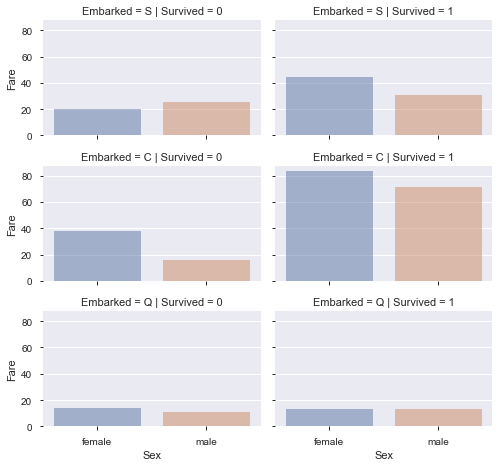

In [20]:
grid = sn.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sn.barplot, 'Sex', 'Fare', alpha=.5, ci=None,palette='deep')
np.warnings.filterwarnings('ignore') #ignoro warnings con valores nulos

### Eliminamos dimensiones que no nos parezcan relevantes

In [21]:
train_df.pop('Ticket')
train_df.pop('Cabin')
test_df.pop('Ticket')
test_df.pop('Cabin')
combine = [train_df, test_df]

In [22]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Sacamos los titulos de la columna name para poder analizar mejor si hay correlacion entre el titulo que poseia la persona y si sobrevivio o no

#### Extraemos los titulos

In [23]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#### Vemos si los titulos corresponden al sexo femenino o masculino

In [24]:
pd.crosstab(train_df['Title'],dataset['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Master,9,14
Miss,37,64
Mme,0,1
Mr,83,145
Mrs,21,37
Rev,2,1


#### Reemplazo los titulos antiguos por otros mas sencillos

In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


#### Evaluamos la correlacion entre la columna que creamos title y nuestro target

In [26]:
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


#### Por ultimo mapeamos los titulos con numeros

In [27]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


### Mapeamos la dimencion sex para que quede numerico

In [28]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


### Borramos columnas innecesarias

In [29]:
train_df.pop('Name')
train_df.pop('PassengerId')
test_df.pop('Name')
test_df.pop('PassengerId')
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Para completar los valores faltantes deAge, use números aleatorios entre la media y la desviación estándar, basados en conjuntos de combinaciones de Pclass y Sexo.

#### Creamos una matriz para adivinar

In [30]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

#### Iteramos sobre la dimension sex (0 o 1) y Pclass (1, 2 y 3) para calcular los valores de Age para las 6 combinaciones

In [31]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(( age_guess/0.5 + 0.5 ) * 0.5)
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 55.8+ KB


### Crearemos una dimencion IsAlone combinando SibSp y Parch para lugeo poder borrarlas

#### Primero creamos la dimencion FamilySize 

In [32]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

#### Ahora creamos la dimencion IsAlone segun Family Size

In [33]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,22,1,0,7.2500,S,1,2,0
1,1,1,1,38,1,0,71.2833,C,3,2,0
2,1,3,1,26,0,0,7.9250,S,2,1,1
3,1,1,1,35,1,0,53.1000,S,3,2,0
4,0,3,0,35,0,0,8.0500,S,1,1,1


#### Analisamos la correlacion entre IsAlone y el target

In [34]:
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


#### Borramos las dimensiones que ya no usaremos

In [35]:
train_df.pop('SibSp')
train_df.pop('Parch')
test_df.pop('SibSp')
test_df.pop('Parch')
train_df.pop('FamilySize')
test_df.pop('FamilySize')

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: FamilySize, Length: 418, dtype: int64

In [36]:
combine = [train_df, test_df]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


### Para sacar los nan que nos quedan en la dimension embarked usaremos la moda ya que son solo dos valores

In [37]:
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.9+ KB


### Mapeamos la dimension Embarked con numeros

In [38]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    int32  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int32  
 6   Title     891 non-null    int64  
 7   IsAlone   891 non-null    int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 45.4 KB


### Hacemos el analisis de correlacion entre Embarked y Target

In [39]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


### La unica dimension que nos falta analizar es Fare

#### Primero llenamos los nan con la media de los valores

In [40]:
for dataset in combine:
    dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)

#### Mapeamos la dimension haciendo cuatro rangos 

In [41]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,22,0,0,1,0
1,1,1,1,38,3,1,3,0
2,1,3,1,26,1,0,2,1
3,1,1,1,35,3,0,3,0
4,0,3,0,35,1,0,1,1
...,...,...,...,...,...,...,...,...
15,1,2,1,55,2,0,3,1
16,0,3,0,2,2,2,4,0
17,1,2,0,30,1,0,1,1
18,0,3,1,31,2,0,3,0


### Una vez finalizados los cambios chequeamos nuevamente el dataset

In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   Fare      891 non-null    int32
 5   Embarked  891 non-null    int32
 6   Title     891 non-null    int64
 7   IsAlone   891 non-null    int64
dtypes: int32(4), int64(4)
memory usage: 41.9 KB


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int32
 2   Age       418 non-null    int32
 3   Fare      418 non-null    int32
 4   Embarked  418 non-null    int32
 5   Title     418 non-null    int64
 6   IsAlone   418 non-null    int64
dtypes: int32(4), int64(3)
memory usage: 16.5 KB


### Volvemos a realizar el analisis exploratorio de Profile Report para poder comparar con el reporte del dataset original

In [44]:
prof = ProfileReport(train_df) 
prof.to_file('titanic_salida.html')

### Sacamos los archivos csv ya modificados para poder usar en cualquier otro ejercicio

In [45]:
train_df.to_csv('titanic_train_out.csv', index=False)
test_df.to_csv('titanic_test_out.csv', index=False)